<a href="https://colab.research.google.com/github/paulohenriquegf/portifolio_DS/blob/master/TVSHOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Na atualidade, com diversas plataformas de streaming e muito conteudo sendo produzido, nos perdemos em escolher qual plataforma assinar ou quais plataformas possuem as melhores séries pra se assistir. Com essa análise podemos visualizar e analisar quais plataformas possuem mais seríes e melhores séries.**

Para isso é necessário importar as bibliotecas que utilizaremos e o arquivo que contem o dataset que foi encontrado no Kaggle: https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




#Importando potly
import plotly
import plotly.offline as py
import plotly.graph_objs as go

# habilita o modo offline
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)

#Utilizando no colab
import plotly.io as pio
pio.renderers.default = "colab"


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data Science/Estudo   Modelos/Datasets/TV show/tv_shows.csv')

In [0]:
df = df.drop(labels='Unnamed: 0', axis=1)

In [0]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


**Features**

**Age**: is the process of giving age ratings and content advice to films and other audiovisual content to help children and families choose what’s right for them and avoid what’s not.

**IMDb**: is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. 

**Rotten Tomatoes**: is an American review-aggregation website for film and television.


**Netflix**: is a streaming service that allows our members to watch a wide variety of award-winning TV shows, movies, documentaries, and more on thousands of internet-connected devices.

**Hulu**: Hulu is the leading premium streaming service offering live and on-demand TV and movies, with and without commercials, both in and outside the home. 

**Prime Video**: is a video streaming service available for Amazon Prime members. With an eligible Amazon Prime membership, you have access to thousands of Prime Video titles at no additional cost.


**Disney+**: is the exclusive home for your favorite movies and TV shows from Disney, Pixar, Marvel, Star Wars, and National Geographic.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   Year             5611 non-null   int64  
 2   Age              3165 non-null   object 
 3   IMDb             4450 non-null   float64
 4   Rotten Tomatoes  1011 non-null   object 
 5   Netflix          5611 non-null   int64  
 6   Hulu             5611 non-null   int64  
 7   Prime Video      5611 non-null   int64  
 8   Disney+          5611 non-null   int64  
 9   type             5611 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 438.5+ KB


In [0]:
df.isnull().sum()

Title                 0
Year                  0
Age                2446
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

# IMDB

**Conferindo alguns insigths com a plataforma de avaliação IMDb**

Os 15 titulos de séries melhores avaliados.

In [0]:
df_imdb = df.sort_values(by='IMDb', ascending=False)
print(df_imdb[['Title','Year','IMDb','Age']].head(15))

                    Title  Year  IMDb  Age
3023              Destiny  2014   9.6  NaN
0            Breaking Bad  2008   9.5  18+
3747         Malgudi Days  1987   9.5  all
3177         Hungry Henry  2014   9.5  NaN
3567     Band of Brothers  2001   9.4  18+
2365  The Joy of Painting  1983   9.4  all
4128       Green Paradise  2011   9.3  all
91             Our Planet  2019   9.3   7+
3566             The Wire  2002   9.3  18+
325               Ramayan  1987   9.3  all
1931       Rick and Morty  2013   9.2  18+
4041      Everyday Driver  2017   9.2  NaN
3701             Baseball  1994   9.2  16+
282       Yeh Meri Family  2018   9.2  NaN
3798              The Bay  2010   9.2  NaN


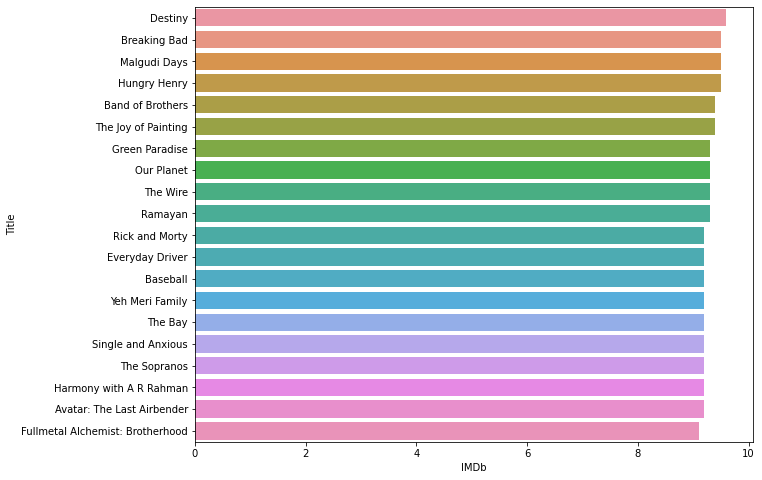

In [0]:
plt.subplots(figsize=(10,8))
sns.barplot(x="IMDb", y="Title" , data= df_imdb.head(20))

Verificando a disposição das notas do IMDb

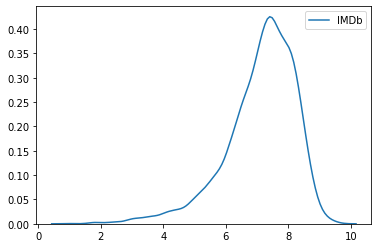

In [0]:
sns.kdeplot(data=df['IMDb'])

Para descobrir a quantidade de TV SHOWS por notas é necessoario agrupar as colunas pelas notas do IMDb e soma-las.

In [0]:
imdb = df[['IMDb','Age','Netflix','Hulu','Prime Video', 'Disney+']].groupby(by='IMDb').sum().reset_index()

In [0]:
imdb['total_rate']= imdb[['Netflix','Hulu','Prime Video', 'Disney+']].sum(axis=1)

In [0]:
trace1= go.Scatter(x=imdb['IMDb'],
                y=imdb['total_rate'],
                mode='lines+markers'
                
                )

layout = go.Layout(title='Total Rate IMDB',
                xaxis_rangeslider_visible=True)
fig = go.Figure(trace1,layout)

fig.show()

A seguir podemos observar quais plataformas que possuem as melhores TV SHOWS de acordo com as notas do IMDb.

In [0]:

#IMDB por plataforma
trace1= go.Scatter(x=imdb['IMDb'],
                y=imdb['Netflix'],
                mode='lines+markers',
                name = "Netflix",
                )

trace2= go.Scatter(x=imdb['IMDb'],
                y=imdb['Hulu'],
                mode='lines+markers',
                name = "Hulu",
                )

trace3= go.Scatter(x=imdb['IMDb'],
                y=imdb['Prime Video'],
                mode='lines+markers',
                name = "Prime Video",
                )

trace4= go.Scatter(x=imdb['IMDb'],
                y=imdb['Disney+'],
                mode='lines+markers',
                name = "Disney+",
                )

layout = go.Layout(title='Total Rate IMDB',
                xaxis_rangeslider_visible=True)

data = [trace1,trace2,trace3,trace4]

py.iplot(data)

# Plataforma


Na atualidade encontramos diversas plataformas de streaming que oferecem TV Shows, abaixo podemos conferir a quantidade de itens disponiveis por plataforma.

In [0]:
#Quantidade TV SHOWS por Plataforma

df_sum = df.sum()
df_sum = df_sum['Netflix':'Disney+']
print(df_sum)

Netflix        1931
Hulu           1754
Prime Video    2144
Disney+         180
dtype: object


In [0]:
#Quantidade TV SHOWS por Plataforma

trace1 = go.Bar(x=df_sum.values, 
                y=df_sum.index, 
                orientation='h',
                text=df_sum.values,
                textposition='auto'
                
               
               )
x = [trace1]

layout = go.Layout(title="Quantidade TV SHOWS por Plataforma",
                   yaxis={'title':'Plataforma'},
                   xaxis={'title': 'Quantidade'})

fig = go.Figure(x, layout=layout)
fig.show()

# Faixa Etária


A faixa etária é importante pois com ela os conteudos são classificados de acordo com a idade que podem ser assistindos, assim melhorando o acompanhamento dos pais a respeito do que seus filhos estão vendo ou podem ver.

Abaixo realizamos a soma por idade de cada uma dessas plataformas.

In [0]:
df_age = df[['Age','Netflix','Hulu','Prime Video', 'Disney+']].groupby(by='Age').sum().reset_index()


In [0]:
df_age['total_age']= df_age[['Netflix','Hulu','Prime Video', 'Disney+']].sum(axis=1)

In [0]:
df_age.head(10)

,Age,Netflix,Hulu,Prime Video,Disney+,total_age
0,13+,3,0,1,0,4
1,16+,398,514,209,3,1124
2,18+,359,239,182,0,780
3,7+,300,365,224,66,955
4,all,171,159,192,81,603


In [0]:
trace1= go.Bar(x=df_age['Age'],
               y=df_age['total_age'],
               text=df_age['total_age'],
               textposition='auto'
               )

layout= go.Layout(title='Quantidade Total por Classificação etaria',
                  xaxis={'title':'Classificação etária'},
                  yaxis={'title': 'Quantidade'}
                 
                  )

fig = go.Figure(trace1, layout)
fig.show()



In [0]:
#Faixa etária Netflix
trace1= go.Bar(x=df_age['Age'],
               y=df_age['Netflix'],
               text=df_age['Netflix'],
               textposition='auto')

layout = go.Layout(title='Faixa etária Netflix',
                   xaxis={'title':'Faixa etária'},
                   yaxis={'title':'Quantidade'}
                          )

fig = go.Figure(trace1,layout)
fig.show()

In [0]:
#Faixa etária Hulu
trace1= go.Bar(x=df_age['Age'],
               y=df_age['Hulu'],
               text=df_age['Hulu'],
               textposition='auto')

layout = go.Layout(title='Faixa etária Hulu',
                   xaxis={'title':'Faixa etária'},
                   yaxis={'title':'Quantidade'}
                          )

fig = go.Figure(trace1,layout)
fig.show()

In [0]:
#Faixa etária Hulu
trace1= go.Bar(x=df_age['Age'],
               y=df_age['Prime Video'],
               text=df_age['Prime Video'],
               textposition='auto')

layout = go.Layout(title='Faixa etária Prime Video',
                   xaxis={'title':'Faixa etária'},
                   yaxis={'title':'Quantidade'}
                          )

fig = go.Figure(trace1,layout)
fig.show()

In [0]:
#Faixa etária Disney+
trace1= go.Bar(x=df_age['Age'],
               y=df_age['Disney+'],
               text=df_age['Disney+'],
               textposition='auto')

layout = go.Layout(title='Faixa etária Disney+',
                   xaxis={'title':'Faixa etária'},
                   yaxis={'title':'Quantidade'}
                          )

fig = go.Figure(trace1,layout)
fig.show()

# Data

Abaixo realizo a soma total de titulos disponiveis em cada ano

In [0]:
df_year = df[['Year','Age','Netflix','Hulu','Prime Video', 'Disney+']].groupby(by='Year').sum().reset_index()

In [0]:
df_year['total_year']= df_year[['Netflix','Hulu','Prime Video', 'Disney+']].sum(axis=1)

In [0]:
df_year.tail()

,Year,Netflix,Hulu,Prime Video,Disney+,total_year
76,2016,219,134,231,10,594
77,2017,221,132,305,19,677
78,2018,272,139,155,13,579
79,2019,233,109,36,22,400
80,2020,110,41,18,8,177


In [0]:
trace1= go.Scatter(x=df_year['Year'],
                y=df_year['total_year'],
                mode='lines+markers'
                
                )

layout = go.Layout(title='Quantidade total por Ano',
                xaxis_rangeslider_visible=True)
fig = go.Figure(trace1,layout)

fig.show()